# Assignment 6.1

- Name:  Victor Hugo Germano
- Date: 10/08/2024

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

sns.set()

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


In [8]:
data = pd.read_csv('http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat', sep=r'\s+')
print(data.head())
race_data = pd.DataFrame(data)

               race  distance  climb   timeM   timeW
0        AnTeallach      10.6  1.062   74.68   89.72
1      ArrocharAlps      25.0  2.400  187.32  222.03
2  BaddinsgillRound      16.4  0.650   87.18  102.48
3          BeinnLee      10.2  0.260   41.58   52.52
4        BeinnRatha      12.0  0.240   47.75   58.78


(a)  Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.


`Your answer goes here`

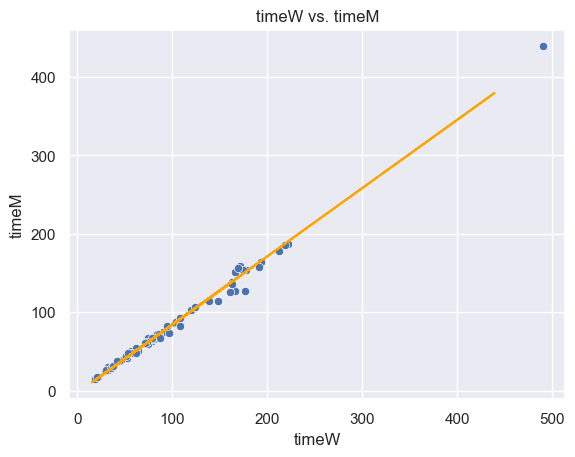

Prediction equation: timeM = -2.834 + 0.871 * timeW
Predicted timeM for timeW=490.05: 423.94 minutes


In [4]:
x = race_data['timeW'] 
y = race_data['timeM'] 

m, b = np.polyfit(x, y, deg=1)
sns.scatterplot(data=race_data, x='timeW', y='timeM')
plt.title('timeW vs. timeM')

#  best-fit line based on slope-intercept formula
plt.plot(y, m * y + b, color = 'orange')
plt.show()

# regression
model = LinearRegression().fit(race_data[['timeW']].values, y)

# prediction 
slope = model.coef_[0]
intercept = model.intercept_
print(f"Prediction equation: timeM = {intercept:.3f} + {slope:.3f} * timeW")


record_time = [[490.05]]
print(f"Predicted timeM for timeW=490.05: {model.predict(record_time)[0]:.2f} minutes")

(b) Find and interpret the correlation.

`Your answer goes here`

### Interpretation

Analyzing the graph
1. Distance and Climb (0.514471): moderate positive correlation, suggesting that longer races tend to have more elevation gain, but the relationship isn't very strong.

2. Distance and Time: strong positive correlation for Men and Women, indicating that as race distance increases, the time taken by both men and women increases almost proportionally.

3. Climb and Time: Moderate positive correlation for Men and Women, sugesting that races with more elevation gain tend to take longer for both men and women, but the relationship isn't as strong as with distance.

4. TimeM and TimeW (0.995873): Strong positive correlation, indicating that the performance patterns of men and women across different races are very similar.

Key Observations:
1. Distance is the strongest predictor of race time for both men and women.
2. Elevation gain (climb) has a moderate impact on race times, but less so than distance.
3. Men's and women's performances are closely related across races.
4. The relationship between distance and climb is only moderate, where longer races don't have proportionally more elevation gain.


          distance     climb     timeM     timeW
distance  1.000000  0.514471  0.962968  0.955549
climb     0.514471  1.000000  0.672009  0.685292
timeM     0.962968  0.672009  1.000000  0.995873
timeW     0.955549  0.685292  0.995873  1.000000


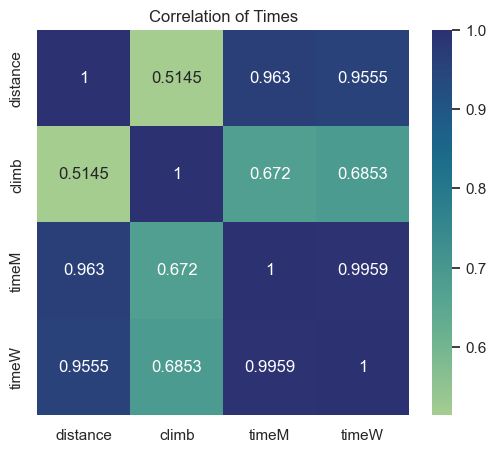

In [27]:
plt.figure(figsize=(6,5))

X = race_data.loc[:, ~race_data.columns.isin(['race'])]
print(X.corr())
sns.heatmap(X.corr(),annot=True,fmt='.4g', cmap="crest")
plt.title("Correlation of Times")
plt.show()


(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

`Your answer goes here`

In [36]:
x = race_data['timeW']
y = race_data['timeM']

# Fit the model
model = sm.OLS(y, x)
results = model.fit()

slope = results.params.iloc[0]
print(f"Slope: {slope}")

# Print out the statistics
print(results.summary())

Slope: 0.8522743430587467
                                 OLS Regression Results                                
Dep. Variable:                  timeM   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.107e+04
Date:                Tue, 08 Oct 2024   Prob (F-statistic):                    1.86e-85
Time:                        10:36:57   Log-Likelihood:                         -217.77
No. Observations:                  68   AIC:                                      437.5
Df Residuals:                      67   BIC:                                      439.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.

`Your answer goes here`

In [46]:
# Pulling in data for data frame
data_url = 'http://stat4ds.rwth-aachen.de/data/Firearms.dat'
data = pd.read_csv(data_url, sep=r'\s+')
df = pd.DataFrame(data)
print(df.head())

    Nation  deaths  firearms
0  Austria     1.8        30
1  Belgium     2.9        17
2   Canada     5.1        31
3  Denmark     2.2        12
4  Finland     2.6        45


### Interpretation
Analyzing the data it is clear that US is an outlier with the number of deaths far greater than any other country in the dataset, and with over the double ne number of firearms.

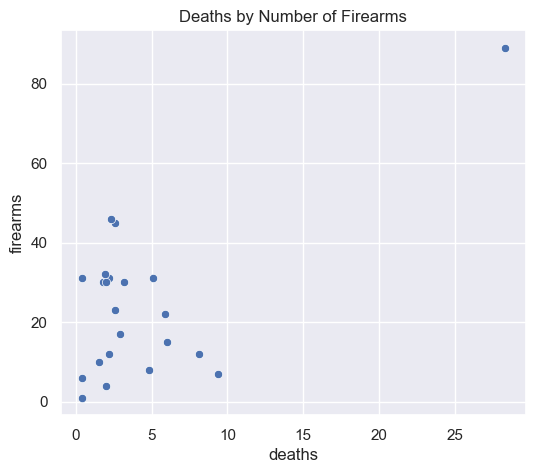

In [45]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='deaths', y='firearms')
plt.title("Deaths by Number of Firearms")
plt.show()

(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

`Your answer goes here`

### Interpretation

Important to notice the role an outlier plays in our interpretation. That's why we ploted both graph showing the correlation between deaths and number of firearms.

With the US, the dataset represents a medium to strong positive correlation between number of firearms and increase in deaths.
Without the US, this correlation completly changes to a negative correlation, that we can say that having more guns can decrease the number of deaths. This is impressive. 


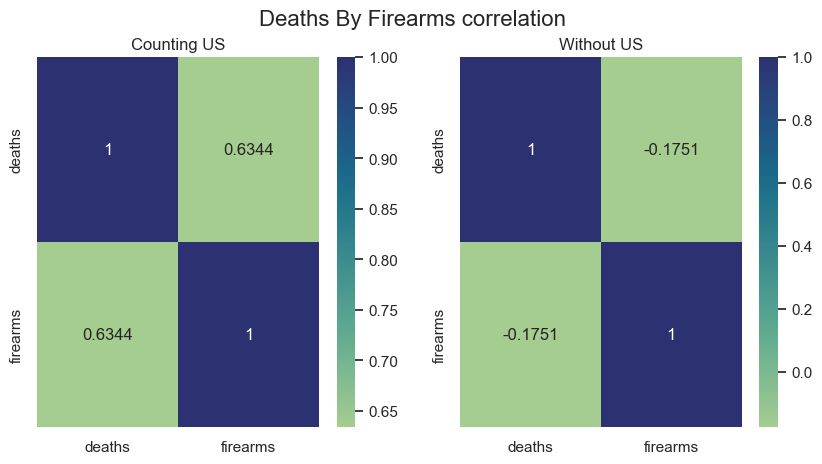

In [58]:
with_us = df.loc[:, ~df.columns.isin(['Nation'])]

without_us = df.drop(df[df["Nation"] == "US"].index)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

sns.heatmap(with_us.corr(),annot=True,fmt='.4g', cmap="crest", ax=ax0)
ax0.set_title('Counting US')


sns.heatmap(without_us[['deaths', 'firearms']].corr(),annot=True,fmt='.4g', cmap="crest", ax=ax1)
ax1.set_title('Without US')


fig.suptitle('Deaths By Firearms correlation', fontsize=16)
fig.set_figwidth(10)
plt.show() 

(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

`Your answer goes here`

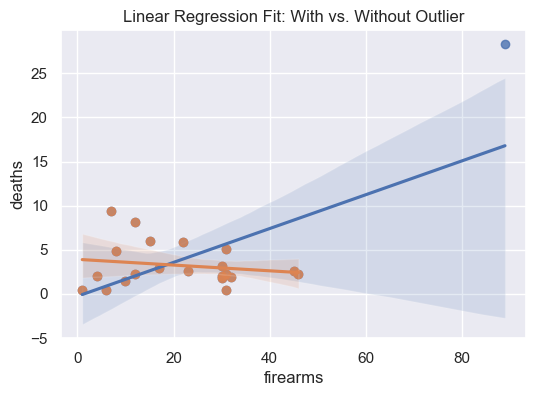

In [68]:

# visualization
plt.figure(figsize=(6, 4))

# plotting regression line for all data
sns.regplot(x='firearms', y='deaths', data=with_us)
sns.regplot(x='firearms', y='deaths', data=without_us)

plt.title('Linear Regression Fit: With vs. Without Outlier')

plt.show()

## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat 

In [69]:
# Pulling in data for data frame
data_url = 'http://stat4ds.rwth-aachen.de/data/Covid19.dat'
data = pd.read_csv(data_url, sep=r'\s+')
df = pd.DataFrame(data)
print(df.head())

   day  cases
0    1     16
1    2     24
2    3     30
3    4     53
4    5     80


(a) Construct the two scatterplots shown in Figure 6.3.

`Your answer goes here`

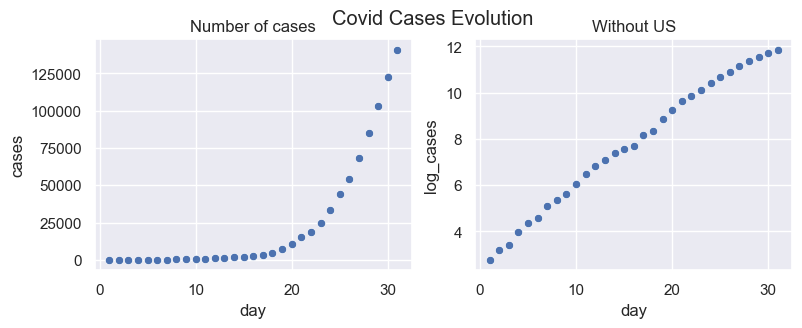

In [82]:
df["log_cases"] = np.log(df["cases"])
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=df, x='day', y='cases', ax=ax0)
ax0.set_title('Number of cases')


sns.scatterplot(data=df, x='day', y='log_cases', ax=ax1)
ax1.set_title('Without US')



plt.suptitle("Covid Cases Evolution")
fig.set_figwidth(9)
fig.set_figheight(3)
plt.show()


(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

`Your answer goes here`

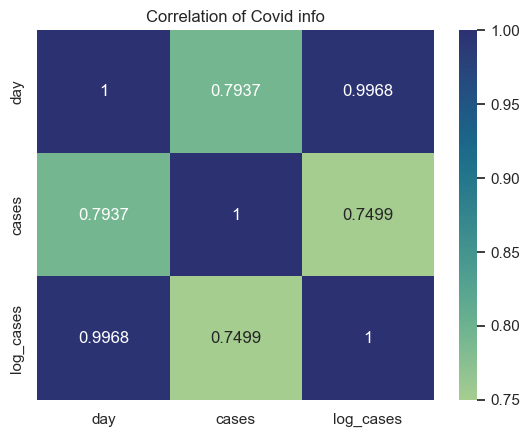

In [83]:

sns.heatmap(df.corr(),annot=True,fmt='.4g', cmap="crest")
plt.title("Correlation of Covid info")
plt.show()

(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

`Your answer goes here`

In [91]:
from sklearn.linear_model import LinearRegression

X=df[['day']]
y=df["log_cases"]

# fit the model
model = LinearRegression().fit(X, y)

# coeficients
intercept = model.intercept_ 
slope = model.coef_[0]

equation = f"log(Y) = {slope:.3f}X + {intercept:.3f}"
print(equation)

def runequation(intercept, slope, days):
    return np.exp(slope*days + intercept)

d = 10 #example days
d_y1 = runequation(intercept, slope, d)
d_y2 = runequation(intercept, slope, d+1)

print (f"Predicted count for x+1: {d_y2/d_y1}")

log(Y) = 0.309X + 2.844
Predicted count for x+1: 1.3617995680228734


### Interpretation

Equation for original data:
$\log(Y) = 0.309 + 2.844$

To interpret predictions in the original scale of log(Y), the formula is:

$ Y = e^{(b_0 + b_1X)} $

---


## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

`Your answer goes here`

### Answer 
Simpsons paradox is a phenomenon in statistics where a trend observed in several different groups of data disappears or reverses when the groups are combined.

One possible explanation is the problem described as **Confounding Variables**, when an external factor affects both independed and dependent variables, potentially misleading associations, just as described on the book: when combined for all the data, Education and Crime have a positive correlation - we did not account for the fact that urbanization plays an important role in the analysis, affecting both indepent variables.

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

`Your answer goes here`

In [97]:

# Pulling in data for data frame
data_url = 'http://stat4ds.rwth-aachen.de/data/Florida.dat'
data = pd.read_csv(data_url, sep=r'\s+')
df = pd.DataFrame(data)
print(df.head())

     County  Crime  Income    HS  Urban
0   ALACHUA    104    22.1  82.7   73.2
1     BAKER     20    25.8  64.1   21.5
2       BAY     64    24.7  74.7   85.0
3  BRADFORD     50    24.6  65.0   23.2
4   BREVARD     64    30.5  82.3   91.9


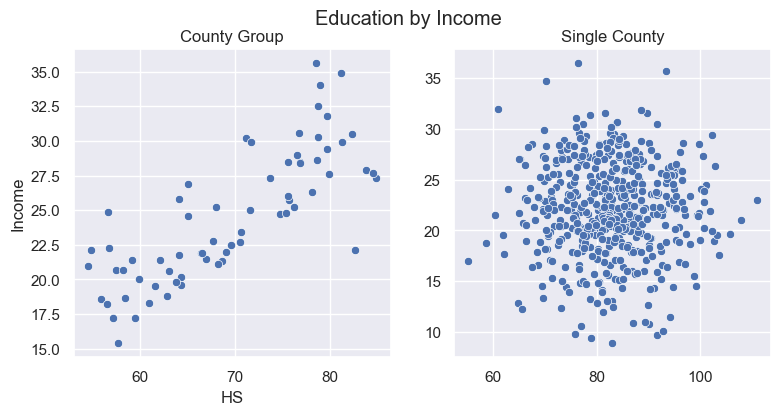

In [101]:
# setup hypothetical county data
county_education = np.random.normal(df['HS'][0], df['HS'].std(), 500)
county_income = np.random.normal(df['Income'][0], df['Income'].std(), 500)

# Plot both scatterplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

sns.scatterplot(data=df, x='HS', y='Income', ax=ax0)
ax0.set_title('County Group')


sns.scatterplot(x=county_education, y=county_income, ax=ax1)
ax1.set_title('Single County')



plt.suptitle("Education by Income ")
fig.set_figwidth(9)
fig.set_figheight(4)
plt.show()


(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

`Your answer goes here`

In [ ]:
# plot values from that
# a line that starts at zero


## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

`Your answer goes here`

(b)  Summarize the estimated effect of *hsgpa.*

`Your answer goes here`

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

`Your answer goes here`

## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.


`Your answer goes here`

(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

`Your answer goes here`

(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

`Your answer goes here`

(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

`Your answer goes here`

## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

`Your answer goes here`

## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

`Your answer goes here`

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

`Your answer goes here`

(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

`Your answer goes here`

(d) Which model is preferred according to AIC?

`Your answer goes here`

## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

`Your answer goes here`

(b)  For what weight values do the sheep have more than a 50% chance of survival?

`Your answer goes here`

## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

`Your answer goes here`

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

`Your answer goes here`

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”